In [1]:
import seaborn as sns
import pandas as pd
sns.set()


In [3]:
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [4]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [5]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [6]:
planets['method'].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

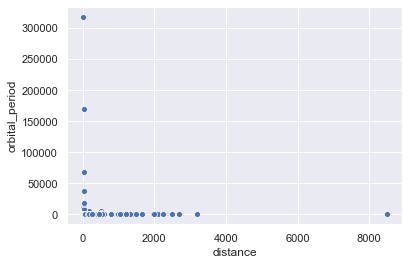

In [7]:
sns.scatterplot(data=planets, x='distance', y='orbital_period')

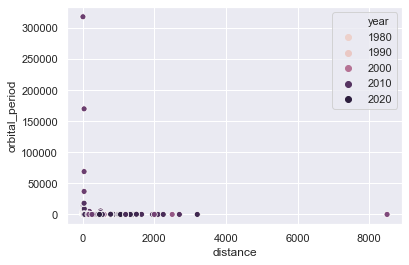

In [8]:
sns.scatterplot(data=planets, x='distance', y='orbital_period', hue='year')

size에 mass를 넣으면 distance가 8000이 넘는 것에서 350으로 확 줄고, 앞에 몰려있는 값들을 확대를 해서 그리게 된다.

4개의 변수를 하나의 그래프에 넣은 것이다.

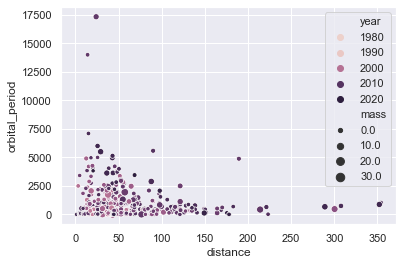

In [9]:
sns.scatterplot(data=planets, x='distance', y='orbital_period', hue='year', size='mass')

distance 컬럼을 보면 min부터 50%까지는 점차적으로 증가하는데 75% max를 보면 엄청나게 커지는 것으로 보아
이상치가 있다는 것을 알 수 있다.

In [10]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


mass와 year를 넣는 순간 distance와 orbital_period값이 확 줄어들었다.

이 두 컬럼에 결측치가 있어서 결측치를 제외하고 그렸다는 것을 알 수 있다.

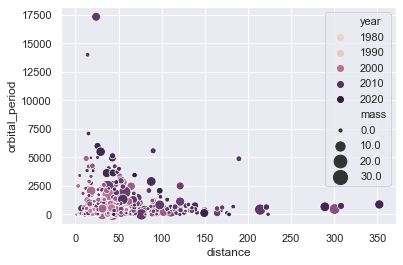

In [11]:
sns.scatterplot(data=planets, x='distance', y='orbital_period', hue='year', size='mass', sizes=(10,200))

괄호()를 쓰지 않으면 연산자 우선순위 때문에 type 오류가 발생한다.

 cannot compare a dtyped [float64] array with a scalar of type [bool]

In [19]:
zoom = planets[(planets['distance'] < 200) & (planets['orbital_period'] < 7500)]
zoom.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


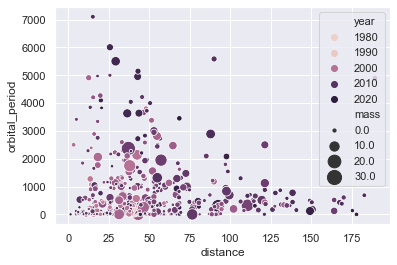

In [20]:
sns.scatterplot(data=zoom, x='distance', y='orbital_period', hue='year', size='mass', sizes=(10,200))

scatterplot과 lmplot은 수치형 데이터 두개의 상관분석을 할 때 주로 쓰이기도 한다.

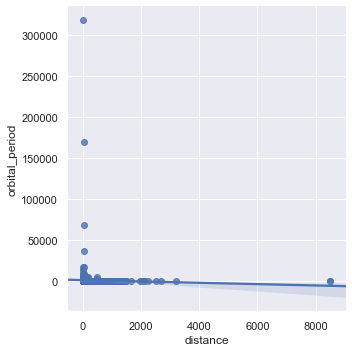

In [22]:
sns.lmplot(data=planets, x='distance', y='orbital_period')

In [23]:
planets[['distance','orbital_period']].corr()

,distance,orbital_period
distance,1.000000,-0.034365
orbital_period,-0.034365,1.000000


In [24]:
planets[planets['distance'] > 8000]

,method,number,orbital_period,mass,distance,year
951,Transit,1,4.200,NaN,8500.0,2006
952,Transit,1,1.796,NaN,8500.0,2006


In [25]:
planets[planets['orbital_period'] > 30000]

,method,number,orbital_period,mass,distance,year
68,Imaging,1,318280.0,NaN,7.69,2008
643,Imaging,4,170000.0,NaN,39.94,2008
644,Imaging,4,69000.0,NaN,39.94,2008
645,Imaging,4,37000.0,NaN,39.94,2008
900,Imaging,1,40000.0,NaN,NaN,2011
937,Imaging,1,730000.0,NaN,NaN,2006
944,Pulsar Timing,1,36525.0,NaN,NaN,2003
